# Z-Score


- What are Z-Scores
- Visualizing Z-Scorees
- Hands-on with detecting outliers using Z-scores

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dummy_age = [20,21,24,32,22,34,31,37,40,45,50,4,100,31,33]
dummy_height=[150,155,160,165,170,280,151,156,161,166,171,157,162,166,168]
dummy_df=pd.DataFrame(list(zip(dummy_age,dummy_height)),columns=['Age','Height'])

In [3]:
dummy_df

,Age,Height
0,20,150
1,21,155
2,24,160
3,32,165
4,22,170
5,34,280
6,31,151
7,37,156
8,40,161
9,45,166


### Calcululate z-score using for Height

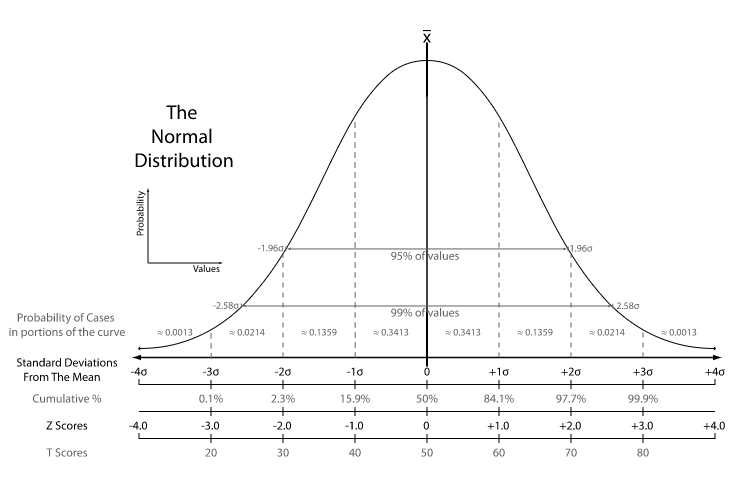

In [4]:
zscore_height = np.abs(scipy.stats.zscore(dummy_df['Height']))
dummy_df.iloc[np.where(zscore_height>3)]

,Age,Height
5,34,280


### Calcululate z-score using for Height

In [5]:
zscore_age = np.abs(scipy.stats.zscore(dummy_df['Age']))
dummy_df.iloc[np.where(zscore_age>3)]

,Age,Height
12,100,162


- Z-scores tell a relative distance of the point from the mean of the dataset.
- We can use them to detect outliers
- Reference
- https://en.wikipedia.org/wiki/Standard_score
- https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm

#### Modifying Z-Scores
- Limitations of Z-Scores
- Modifed Z-scores
- Hands-on with detecting outliers with modified Z-scores

##### Limitations of Z-Scores
- They assume a normal distribution of data
- Also, mean and standard used in the calculation can be easily distorted by outliers

References
- http://annex.ipacweb.org/library/conf/06/wiesen.pdf
- https://www.itl.nist.gov/div898/handbook/eda/section3/eda35h.htm

- Instead of mean, use median
- instead of Standard Deviation, use Median Absolute Deviation (MAD)

- MAD = Median of (|Xi-Median|) for all Xi
- MAD is less affected by outliers, since its calculation dependds on the median
- Modified Z-score for Xi = 0.6745 * (Xi-Median)/Median Absolute

In [6]:
dummy_df

,Age,Height
0,20,150
1,21,155
2,24,160
3,32,165
4,22,170
5,34,280
6,31,151
7,37,156
8,40,161
9,45,166


In [7]:
def modified_z_score(my_data):
    # First Calculate Median
    median_my_data=np.median(my_data)
    # Median Absolute Deviation
    # Median of | Xi-Median of X | for all Xi
    mad = np.median(my_data.map(lambda x:np.abs(x-median_my_data)))
    # Modified Z Score
    # 0.6745 * (Xi-Median of X) / Median Absolute Deviation
    modified_z_score = list(my_data.map(lambda x: 0.6745 * (x-median_my_data)/mad))
    return modified_z_score

In [8]:
modified_z_score(dummy_df['Age'])

[-1.01175,
 -0.9274375,
 -0.6745,
 0.0,
 -0.843125,
 0.168625,
 -0.0843125,
 0.4215625,
 0.6745,
 1.0960625,
 1.517625,
 -2.36075,
 5.73325,
 -0.0843125,
 0.0843125]

In [9]:
mod_z_score_age = modified_z_score(dummy_df['Age'])
dummy_df.iloc[np.where(np.abs(mod_z_score_age)>=3)]

,Age,Height
12,100,162


In [10]:
mod_z_score_height = modified_z_score(dummy_df['Height'])
dummy_df.iloc[np.where(np.abs(mod_z_score_height)>=3)]

,Age,Height
5,34,280


Quick Recap
- Median Asbolute Deviation (MAD) is unaffected by outliers unlike standard deviation
- Modified Z-score for Xi=(Xi-Median)/ Median Absolute Deviation

#### Inter Quartile Range - IQR
- Interquartile Range is defined as range between the first and third quartile
- IQR = 3rd Quartile - 1st Quartile
- Any value which is more than 1.5 * IQR + Q3 or less than Q1 (-)1.5* IQR can be considered as an outlier 

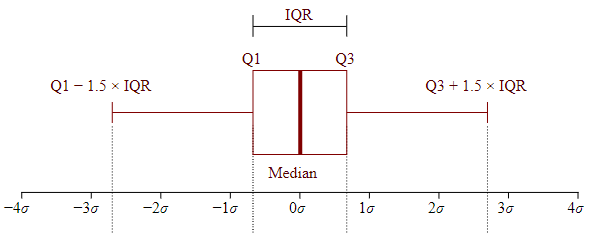

In [11]:
dummy_df

,Age,Height
0,20,150
1,21,155
2,24,160
3,32,165
4,22,170
5,34,280
6,31,151
7,37,156
8,40,161
9,45,166


In [12]:
def get_lower_upper_bound(my_data):
    q1 = np.percentile(my_data,25)
    q3 = np.percentile(my_data,75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5) 
    return lower_bound, upper_bound

In [13]:
def get_outliers_iqr(my_data):
    lower_bound,upper_bound = get_lower_upper_bound(my_data)
    return my_data[np.where((my_data > upper_bound) | (my_data < lower_bound))]

In [14]:
get_outliers_iqr(dummy_df['Age'].values)

array([100], dtype=int64)

In [15]:
get_outliers_iqr(dummy_df['Height'].values)

array([280], dtype=int64)

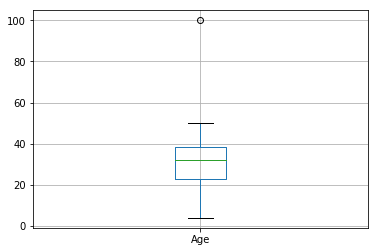

In [16]:
dummy_df.boxplot(column=['Age'], showfliers = True)

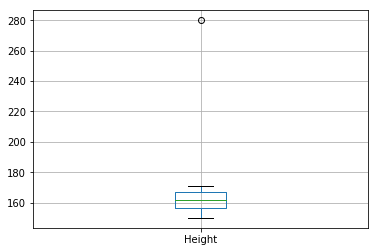

In [17]:
dummy_df.boxplot(column=['Height'])

Quick Recap
- Using IQR, we can detect outliers
- Any value is more than 1.5* IQR + Q3 or less than Q1 (-) 1.5* IQR can be considered as an outlier